First you should try to import a module in Python. 
https://docs.python.org/3/tutorial/modules.html
Make sure you run your code cell once you have written the code. Generally it is good practice to import all modules before you start coding so that you don't run into dependency problems. Don't forget to install your dependencies 
via pip!

In [1]:
# you can remove the '#' here to uncomment the code and run a code cell with your import statements.
# Can you import the pandas module?
import pandas as pd

In [2]:
# We do not have to jump out to a terminal instance to do this. A little shortcut is as follows.
import sys
!{sys.executable} -m pip install numpy

Your next job is to try to write a program! Here's the brief.

Write a program that calculates the size of the world's population at the start of 2022.

The population at the start of 2018 was 7.6 billion. The growth rate at the time was 1.09% per year.  

Assume a fixed population growth rate over the time period.
Put the starting population and growth rate into variables.
Carry out some mathematical operations to compute the population at the start of 2022.
Print out the result.
Challenge exercise: can you convert your code into a function that takes as its inputs the population growth rate, the population in 2018 and the year we would like to know the population in. e.g.:

def get_population(growth_rate, pop_in_2018, target_year)

It should return the population in target_year.

Which variable type would be good to store a numeric value in Python? One of the basic numeric types should be 
fine for this exercise. 

Numeric Types — int, float, complex
https://docs.python.org/3/library/stdtypes.html

In [3]:
# Hint: Complex might be too complex. Can we have a fraction of a person?
# We need to have separate variables for both population and growth rate. These will (probably) be different types.
# The population at the start of 2018 was 7.6 billion. The growth rate at the time was 1.09% per year.  
pop_in_2018 = 7600000000
growth_rate = 0.0109

pop_in_2019 = round(pop_in_2018 + pop_in_2018*growth_rate)
pop_in_2020 = round(pop_in_2019 + pop_in_2019*growth_rate)
pop_in_2021 = round(pop_in_2020 + pop_in_2020*growth_rate)
pop_in_2022 = round(pop_in_2021 + pop_in_2021*growth_rate)

print(pop_in_2019, pop_in_2020, pop_in_2021, pop_in_2022)

7682840000 7766582956 7851238710 7936817212


In [4]:
# To do some prediction we need to combine these things. We need to subtract the starting year from the current year
# and then increase the population according to rate

# If you are a bit stuck you can look at Python operators to see some examples
# https://www.w3schools.com/python/python_operators.asp

# My predictive function
def get_population(growth_rate, pop2018, years):
    for i in range(years):
        calc = pop2018 + pop2018*growth_rate
        pop2018 = calc
    return round(calc)

# if I use years = 4 I will get population in 2022
years = 4

get_population(growth_rate, pop_in_2018, years)

7936817212

Now that we have our prediction it's time to do the clever bit. We might want to reuse this prediction under different circumstances. Your job is to find a way to make a reusable object in Python that is capable of taking any input for the parameters defined. The documentation on this is fairly dense

https://docs.python.org/3/tutorial/controlflow.html

So you might want to use a simpler guide e.g.
https://www.w3schools.com/python/python_functions.asp

In [5]:
# My predictive function goes here

# Advanced exercise: if you are already a Python pro and fancy a challenge, perhaps you could use a predictive
# model to compute this? A linear regression model might be a good place to start. Perhaps you could share your 
# model with us on the forums and give us a sense of how accurate it was?

# Here is my attempt, could be wrong, but at least I tried 
pop=[7600000000, 7682840000, 7766582956, 7851238710, 7936817212]
year=[2018, 2019, 2020, 2021, 2022]
zipped = list(zip(year, pop))

# make a dataframe fom lists
df = pd.DataFrame(zipped, columns=['year','population'])
df

,year,population
0,2018,7600000000
1,2019,7682840000
2,2020,7766582956
3,2021,7851238710
4,2022,7936817212


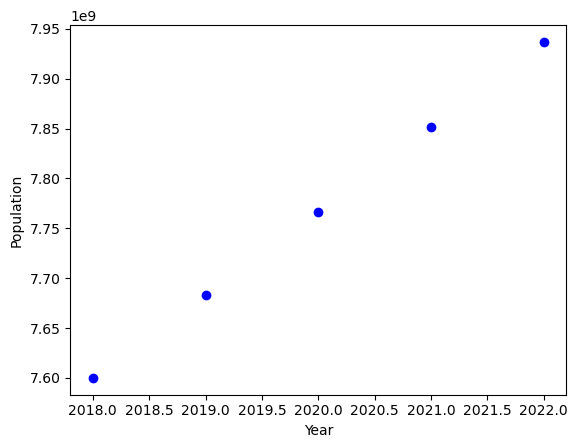

In [6]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn

import matplotlib.pyplot as plt
#import pylab as pl
import numpy as np
%matplotlib inline

plt.scatter(df.year, df.population,  color='blue')
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [7]:
# split tiny dataset
msk = np.random.rand(len(df)) <= 0.7
train = df[msk]
test = df[~msk]

In [8]:
# training data
train_x = train[["year"]]
train_y = np.asanyarray(train[['population']])

Coefficients:  [[84203313.40000002]]
Intercept:  [-1.62322969e+11]


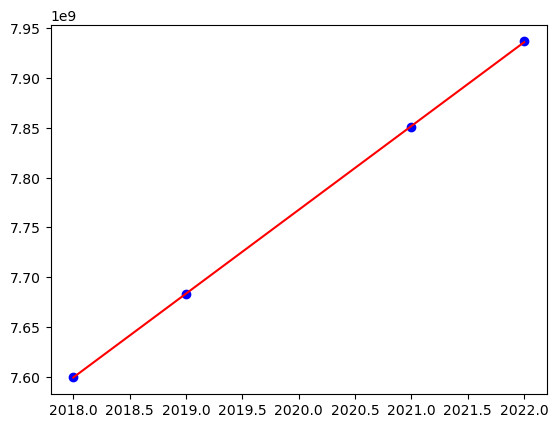

In [9]:
# create linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# check the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# show training data in blue
plt.scatter(train_x, train_y,  color='blue')

# plot the fit line over the training data:
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [10]:
# test data
test_x = test[["year"]]
test_y = test[["population"]]

In [11]:
predictions = regr.predict(test_x)

# predicted value
print(predictions)

# real value from test data
print(test_y)

[[7.76772398e+09]]
   population
2  7766582956


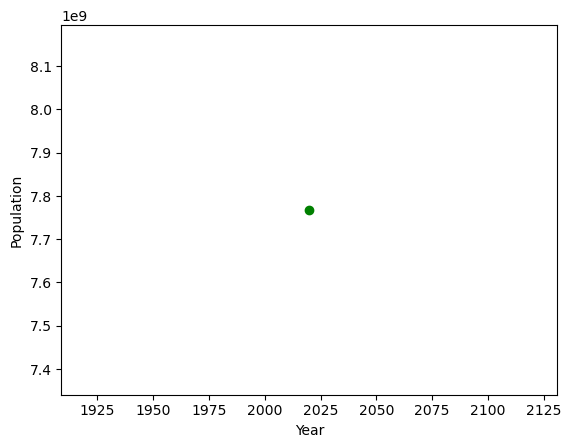

In [12]:
# show predictions in green
plt.scatter(test_x, predictions,  color='green')

plt.xlabel("Year")
plt.ylabel("Population")

plt.show()

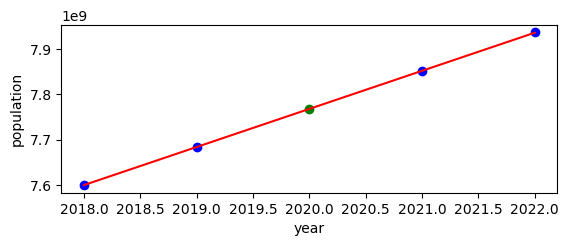

In [13]:
# all in 1 graph:

# training
plt.subplot(2, 1, 1)
train = plt.scatter(train_x, train_y,  color='blue')
plt.ylabel('population')
plt.xlabel('year')

# fit line over training data
plt.subplot(2, 1, 1)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

# prediction
plt.subplot(2, 1, 1)
test = plt.scatter(test_x, predictions,  color='green')

plt.show()

In [14]:
# eror in training dataset is high, even though the result seems fitting into the line,  not sure why the error is that high,
# probably more data is needed and 
# testing should be done on a new dataset and not just the testing part of training dataset.
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 1141024.50


C:\Users\nilph\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [15]:
# I will produce a new dataset for the future years by calling get_population function
# 2023 pop
years = 5
get_population(growth_rate, pop_in_2018, years)

8023328520

In [16]:
# 2024 pop
years = 6
get_population(growth_rate, pop_in_2018, years)

8110782801

In [17]:
# 2025 pop
years = 7
get_population(growth_rate, pop_in_2018, years)

8199190333

In [18]:
# create a new df for future years
new_pop=[8023328520, 8110782801, 8199190333]
new_year=[2023, 2024, 2025]
new_zipped = list(zip(new_year, new_pop))

# make a dataframe fom lists
new_df = pd.DataFrame(new_zipped, columns=['year','population'])
new_df

,year,population
0,2023,8023328520
1,2024,8110782801
2,2025,8199190333


In [19]:
# create test data from the new dataset
x_test = new_df[["year"]]
y_test = new_df[["population"]]

In [20]:
# prediction on unseen data
predictions = regr.predict(x_test)

# predicted value
print(predictions)

# real values from new dataset
print(y_test)

[[8.02033392e+09]
 [8.10453723e+09]
 [8.18874055e+09]]
   population
0  8023328520
1  8110782801
2  8199190333


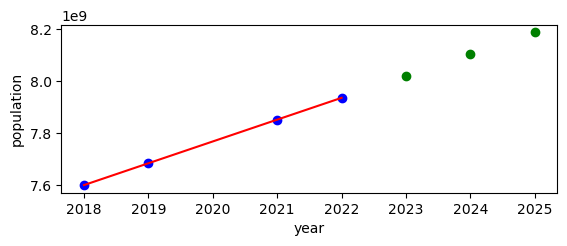

In [21]:
# training on training data and prediction on unseen data in 1 graph:

# training
plt.subplot(2, 1, 1)
train = plt.scatter(train_x, train_y,  color='blue')
plt.ylabel('population')
plt.xlabel('year')

# fit line over training data
plt.subplot(2, 1, 1)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

# prediction
plt.subplot(2, 1, 1)
test = plt.scatter(x_test, predictions,  color='green')

plt.show()

In [22]:
from sklearn.metrics import r2_score
# eror in unseen testing dataset is still high, still not sure why, because the predicted green dots seem to be 
# in the right place, perhaps more data is needed?
# these data science libraries are supposed to be used with large datasets.
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , predictions) )

Mean absolute error: 6563317.23
Residual sum of squares (MSE): 52390915955265.66
R2-score: 0.99


C:\Users\nilph\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
